In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [75]:
df_train = pd.read_csv('/Users/tshmacm1173/Desktop/Sprint 6 ML/Traffic_Jam_Analysis/train_revised.csv')

In [76]:
df_train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [77]:
df_test = pd.read_csv('/Users/tshmacm1173/Desktop/Sprint 6 ML/Traffic_Jam_Analysis/test_questions.csv') 

In [78]:
df_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


In [79]:

df_test["travel_date"] = pd.to_datetime(df_test["travel_date"])
df_test["year"] = df_test["travel_date"].dt.year
df_test["month"] = df_test["travel_date"].dt.month
df_test["day"] = df_test["travel_date"].dt.day
df_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49,2018,5,7
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11,2018,5,6
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11,2018,5,4
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11,2018,5,4
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11,2018,5,4


In [80]:

df_train['travel_date'] = pd.to_datetime(df_train['travel_date'], format='%d-%m-%y')
df_train['year'] = df_train['travel_date'].dt.year  
df_train['month'] = df_train['travel_date'].dt.month  
df_train['day'] = df_train['travel_date'].dt.day 
df_train["weekday"] = df_train["travel_date"].dt.weekday
df_train["is_weekend"] = df_train["weekday"].apply(lambda x: 1 if x >= 5 else 0) 
df_train.head()  

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day,weekday,is_weekend
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,2017,10,17,1,0
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,2017,11,19,6,1
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,2017,11,26,6,1
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,2017,11,27,0,0
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,2017,11,27,0,0


In [89]:

df_train['hour'] = df_train['travel_time'].str.split(':').str[0].astype(int)  
df_train['minute'] = df_train['travel_time'].str.split(':').str[1].astype(int)   
df_train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day,weekday,is_weekend,hour,minute
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,2017,10,17,1,0,7,15
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,2017,11,19,6,1,7,12
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,2017,11,26,6,1,7,5
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,2017,11,27,0,0,7,10
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,2017,11,27,0,0,7,12


In [82]:
df_train.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity', 'year', 'month', 'day', 'weekday', 'is_weekend'],
      dtype='object')

Explotary Data Analysis:

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ride_id          51645 non-null  int64         
 1   seat_number      51645 non-null  object        
 2   payment_method   51645 non-null  object        
 3   payment_receipt  51645 non-null  object        
 4   travel_date      51645 non-null  datetime64[ns]
 5   travel_time      51645 non-null  object        
 6   travel_from      51645 non-null  object        
 7   travel_to        51645 non-null  object        
 8   car_type         51645 non-null  object        
 9   max_capacity     51645 non-null  int64         
 10  year             51645 non-null  int32         
 11  month            51645 non-null  int32         
 12  day              51645 non-null  int32         
 13  weekday          51645 non-null  int32         
 14  is_weekend       51645 non-null  int64

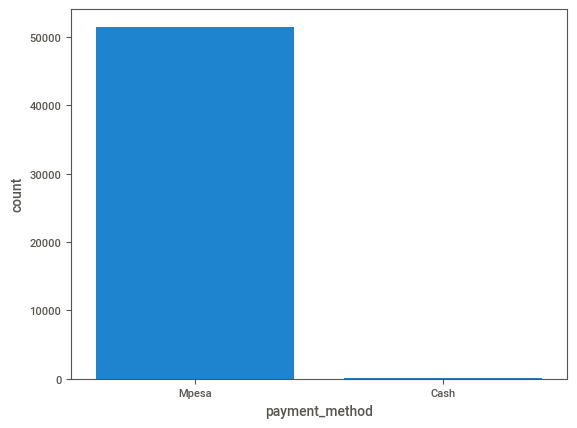

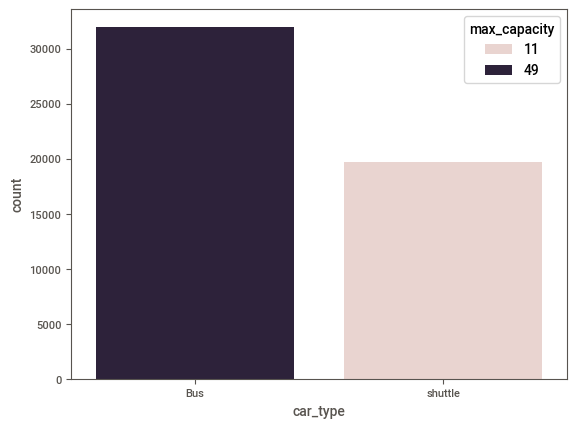

In [ ]:

sns.countplot(x='payment_method', data=df_train)
plt.show()

sns.countplot(x='car_type', hue='max_capacity', data=df_train)
plt.show()


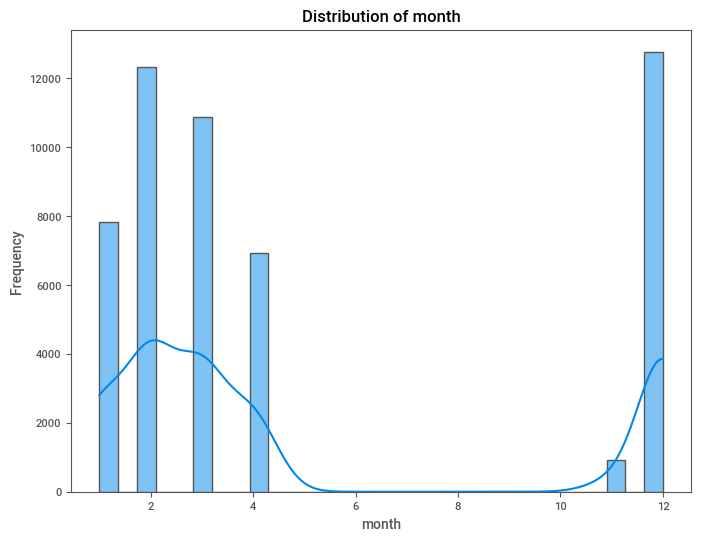

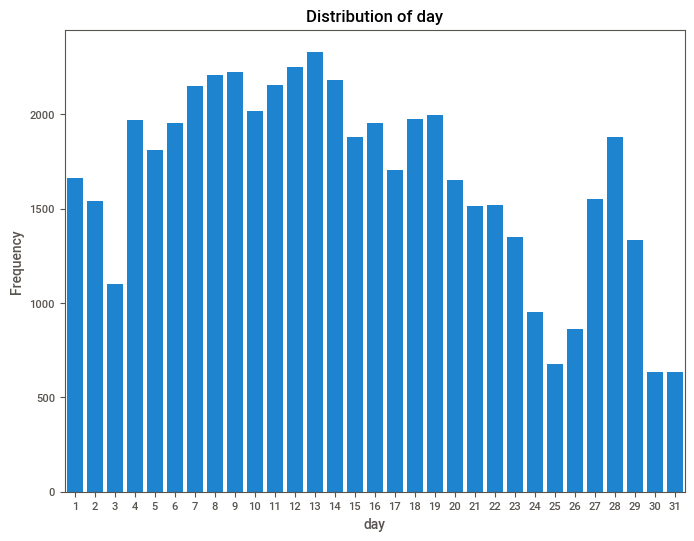

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Explore the distribution of fare
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='month', bins=30, kde=True)
plt.title('Distribution of month')
plt.xlabel('month')
plt.ylabel('Frequency')
plt.show()

# Explore the distribution of passenger class
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='day')
plt.title('Distribution of day')
plt.xlabel('day')
plt.ylabel('Frequency')
plt.show()

In [86]:
!pip install  sweetviz

                                             |          | [  0%]   00:00 -> (? left)

Report claims_analysis_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



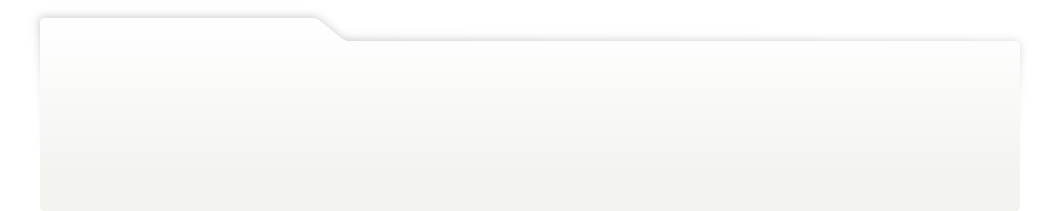
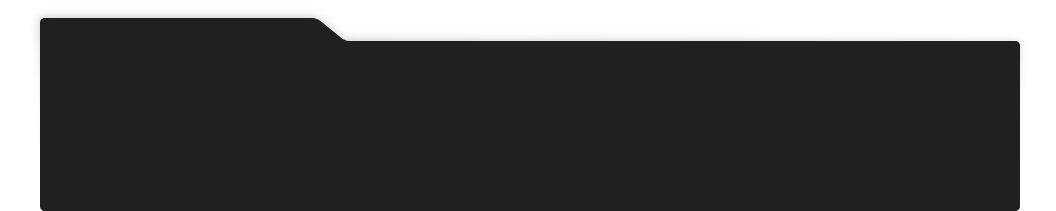
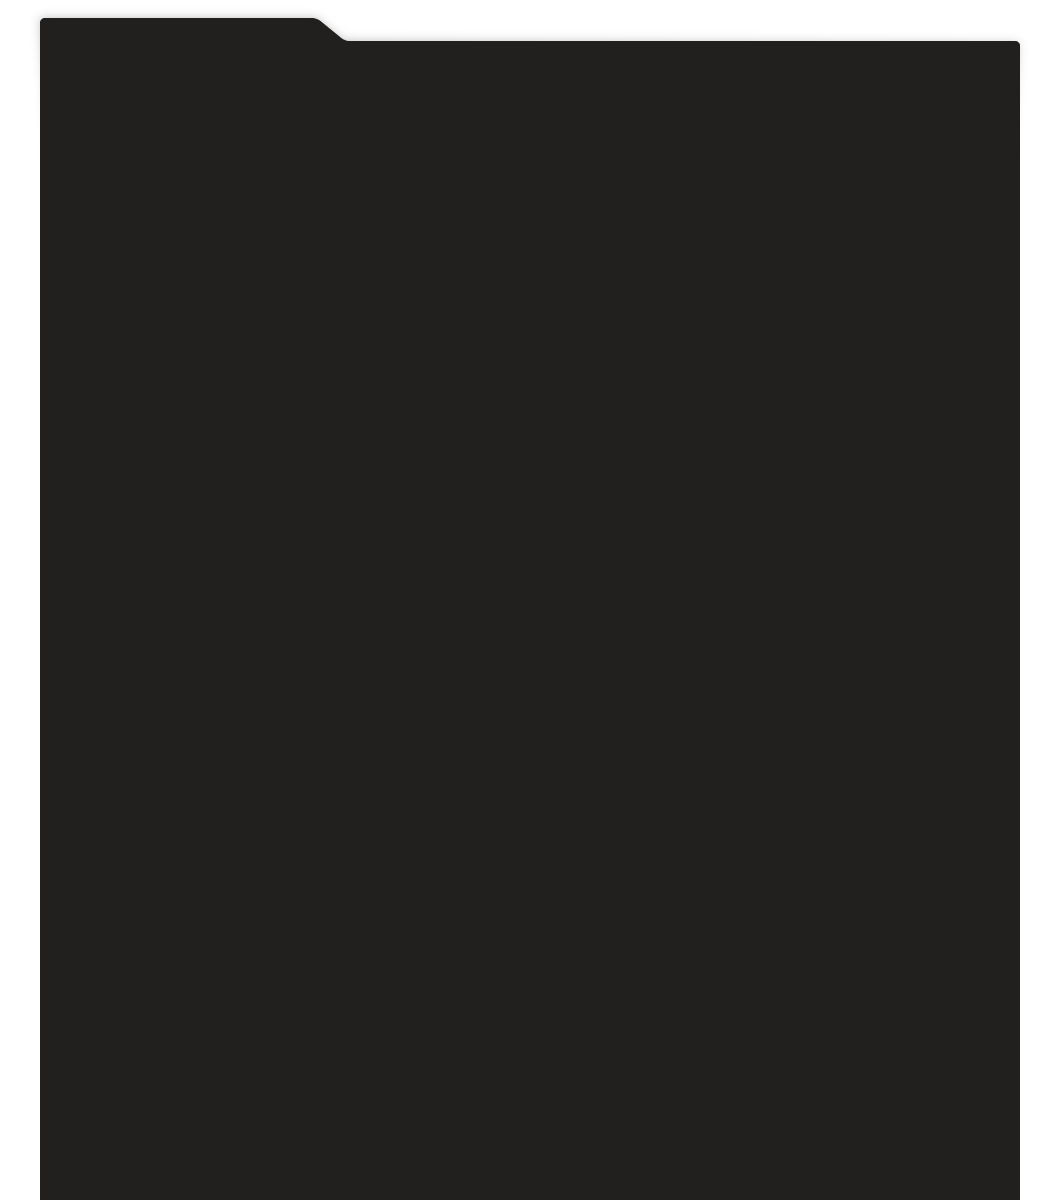
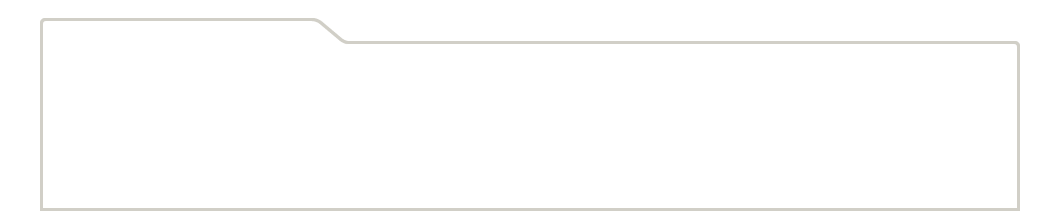
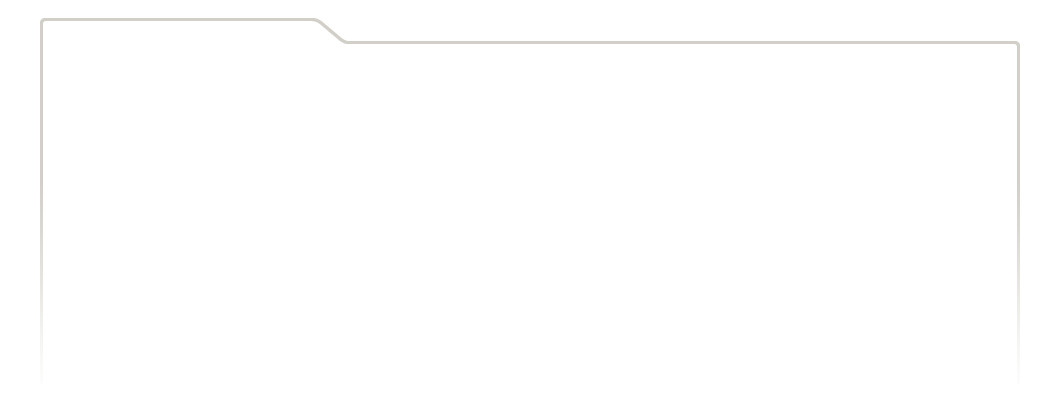
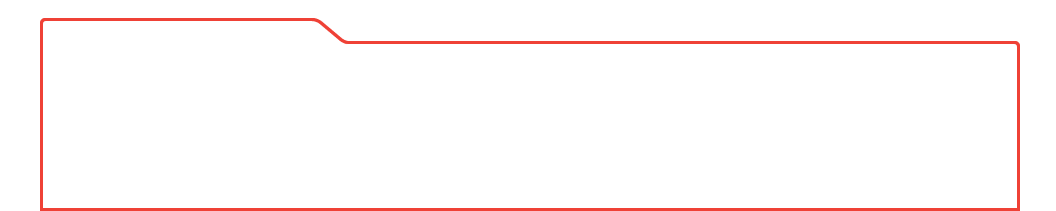
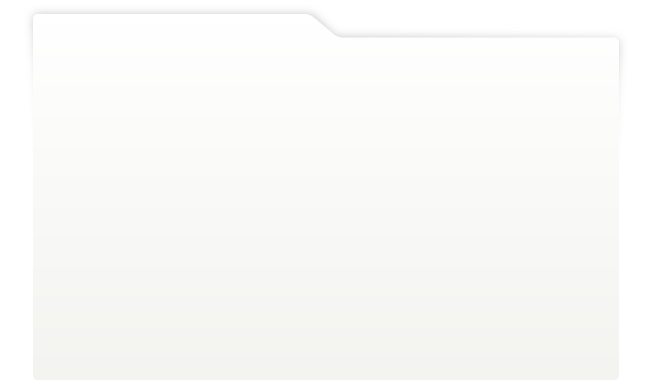
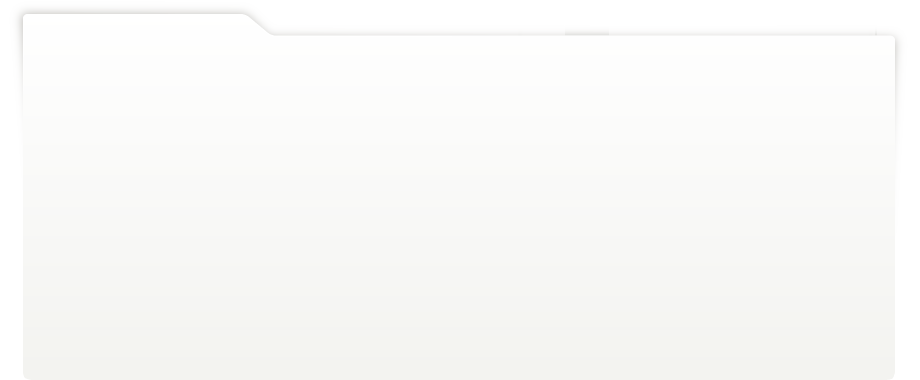
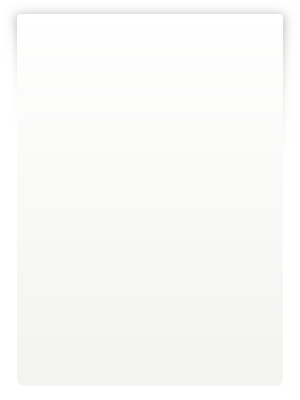
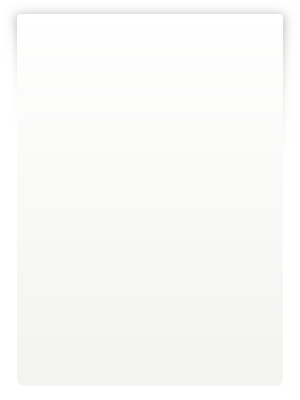
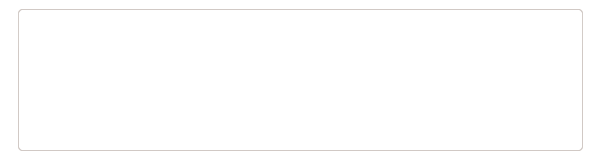
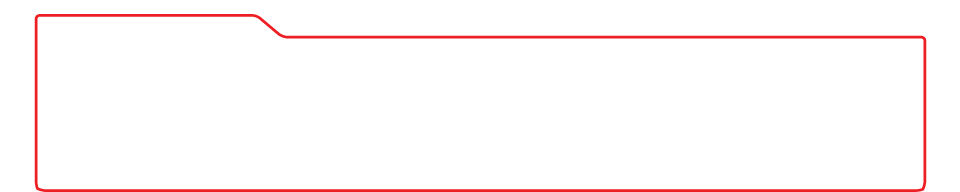
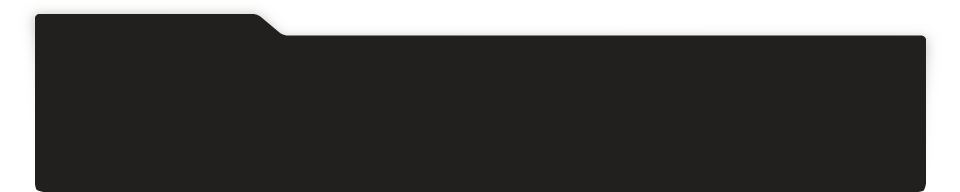
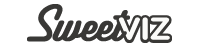
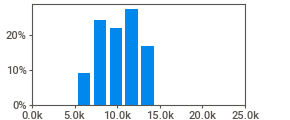
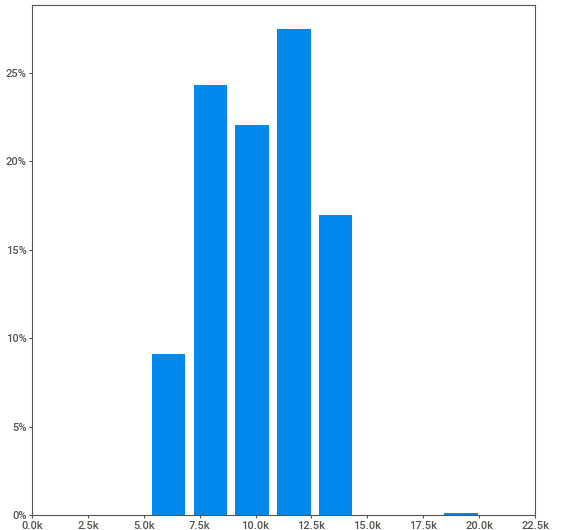
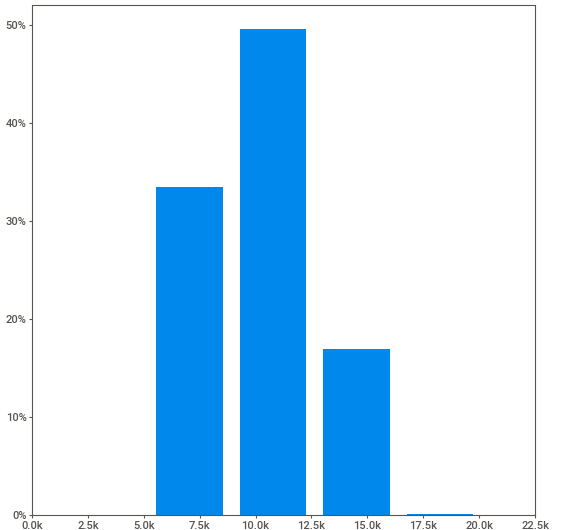
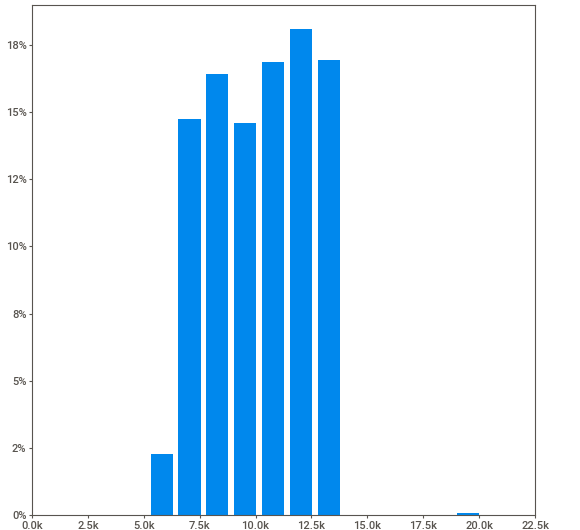
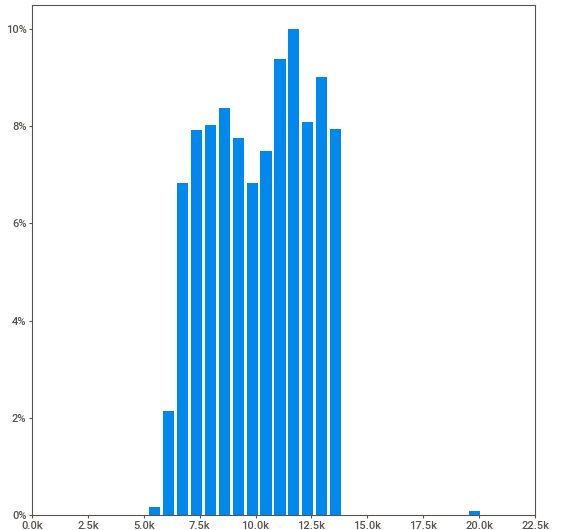
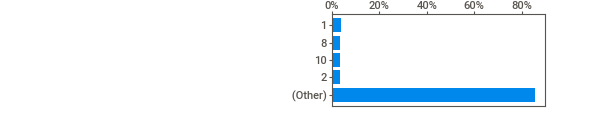
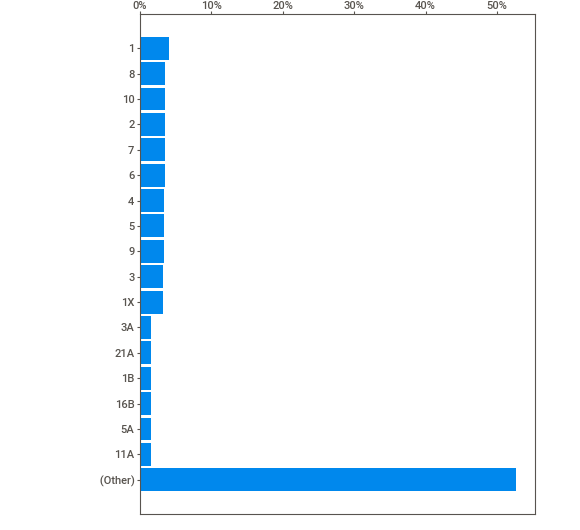
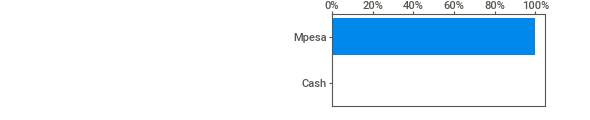
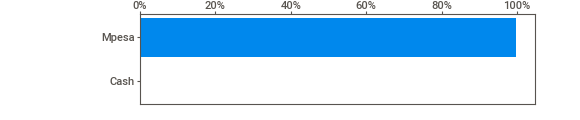
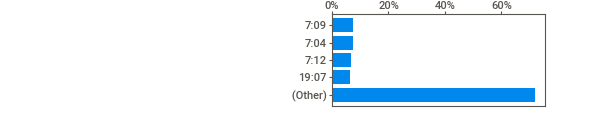
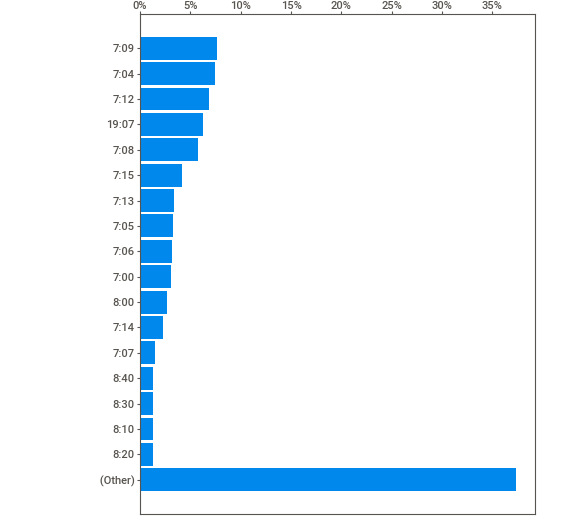
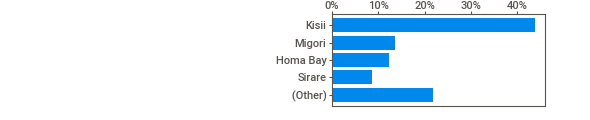
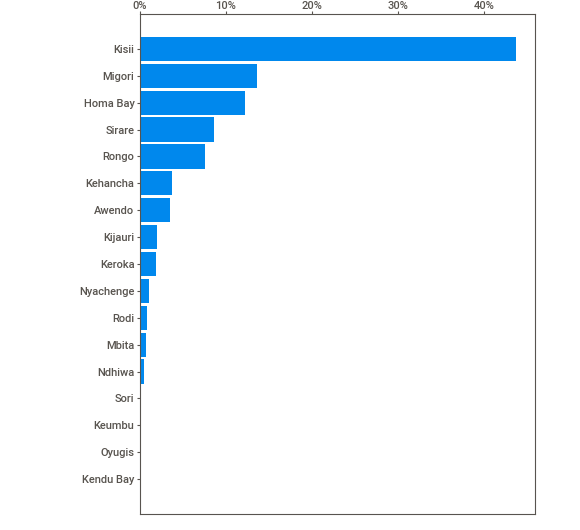
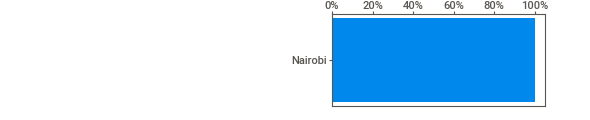
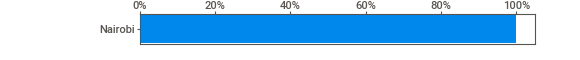
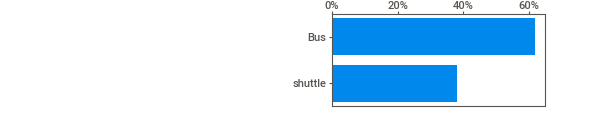
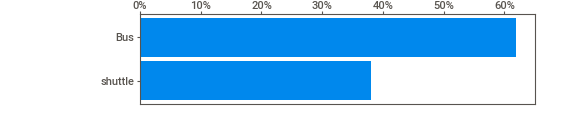
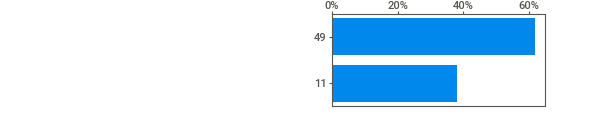
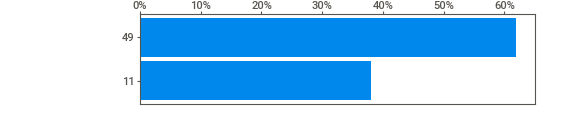
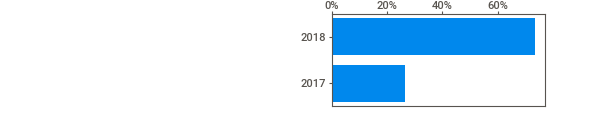
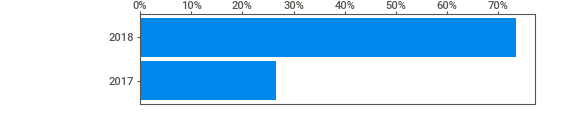
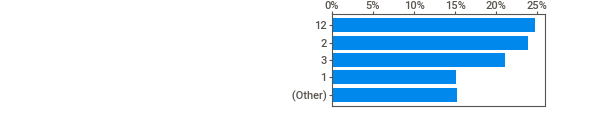
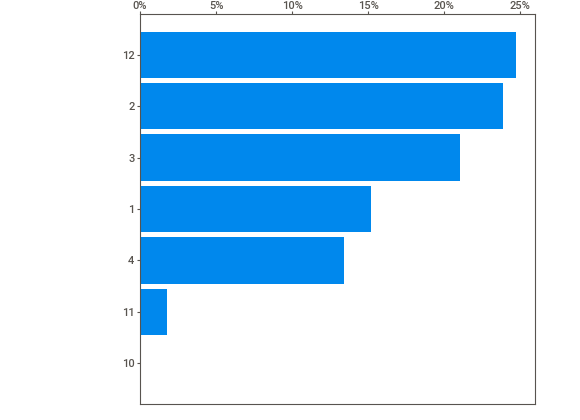
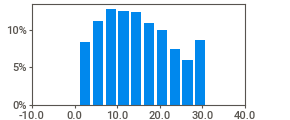
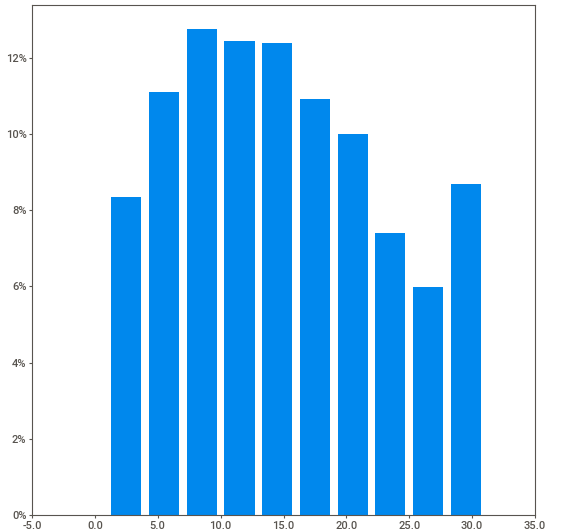
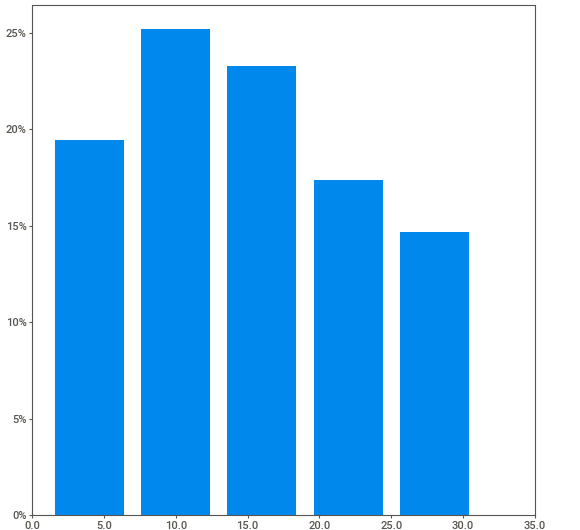
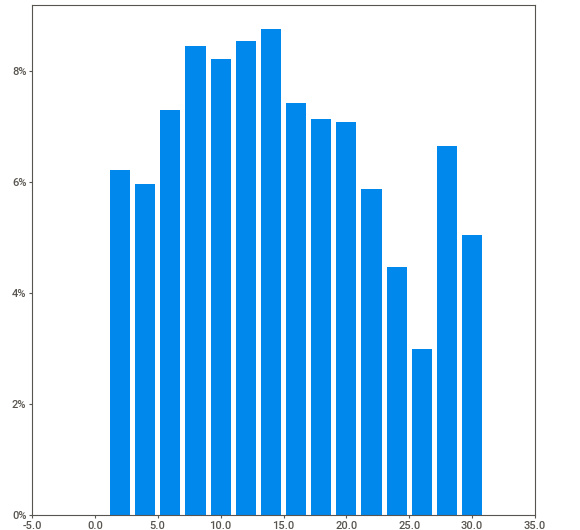
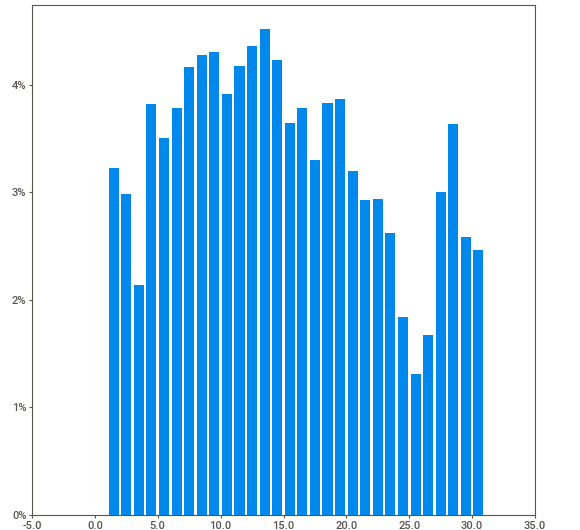
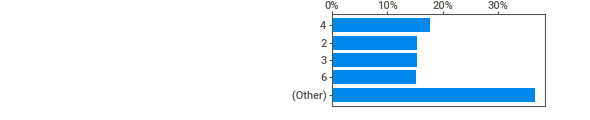
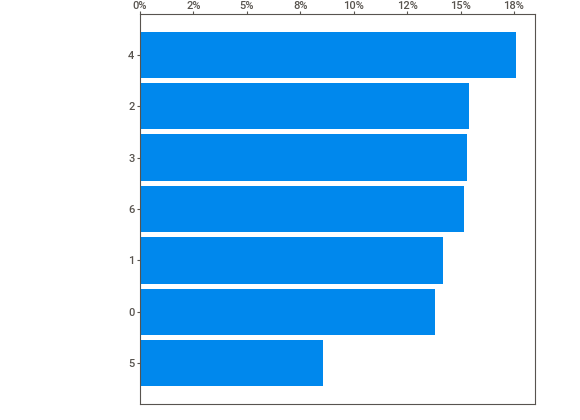
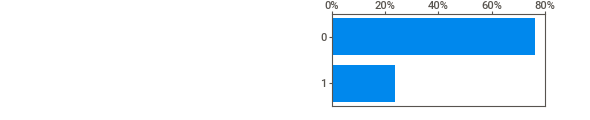
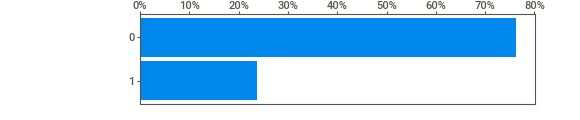
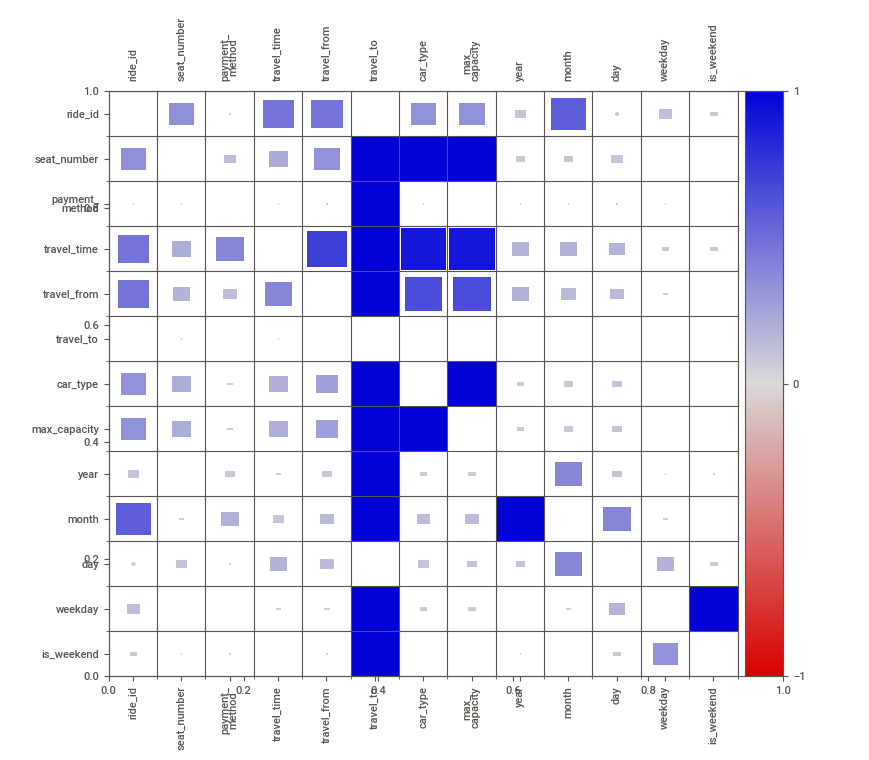
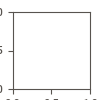

In [87]:
import sweetviz as sv
report = sv.analyze(df_train)
report.show_html("claims_analysis_sweetviz_report.html")
report.show_notebook()